# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [168]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree

import graphviz
import dtreeviz


%matplotlib inline

In [169]:
# Importando a base de dados imobiliários de Boston

boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns=['medv']).copy()
y = boston[['medv']]

In [170]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [171]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

# Verificação das variáveis
 
- Scikit-learn não aceita variáveis string nem missing.

In [172]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [173]:
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [174]:
boston.corr().tail(1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
medv,-0.388305,0.360445,-0.483725,0.17526,-0.427321,0.69536,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.0


Ao visualizar a matriz de correlação obervamos que a variável  **rm** (número médio de quartos por habitação) apresenta um potencial preditivo interessante em relação às outras variáveis.

### 3. Separe os dados em validação e teste

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [176]:
arvore_1 = DecisionTreeRegressor(max_depth=8)
arvore_2 = DecisionTreeRegressor(max_depth=2)

arvore_1.fit(X_train, y_train)
arvore_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [177]:
mse1_train = arvore_1.score(X_train, y_train)
mse1_test = arvore_1.score(X_test, y_test)


mse2_train = arvore_2.score(X_train, y_train)
mse2_test = arvore_2.score(X_test, y_test)



template = "O MSE da árvore com profundidade = {0} para a base de {1} é: {2:.2f}"


print(template.format(arvore_1.get_depth(), 'treino', mse1_train).replace('.', ','))
print(template.format(arvore_1.get_depth(),'teste', mse1_test).replace('.', ','), '\n')

print(template.format(arvore_2.get_depth(), 'treino', mse2_train).replace('.', ','))
print(template.format(arvore_2.get_depth(), 'teste', mse2_test).replace('.', ','))


O MSE da árvore com profundidade = 8 para a base de treino é: 0,98
O MSE da árvore com profundidade = 8 para a base de teste é: 0,79 

O MSE da árvore com profundidade = 2 para a base de treino é: 0,71
O MSE da árvore com profundidade = 2 para a base de teste é: 0,61


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [190]:
print(f'A árvore que me parece mais adequada é a arvore_2, com profundidade = {arvore_2.get_depth()}, visto que apresenta um menor MSE ( Erro médio quadrático) menor do que a árvore_1, sendo seu MSE de {mse2_train} para base de treino e {mse2_test} para base de teste.')

A árvore que me parece mais adequada é a arvore_2, com profundidade = 2, visto que apresenta um menor MSE ( Erro médio quadrático) menor do que a árvore_1, sendo seu MSE de 0.7123495810509062 para base de treino e 0.6100347551605463 para base de teste.


### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

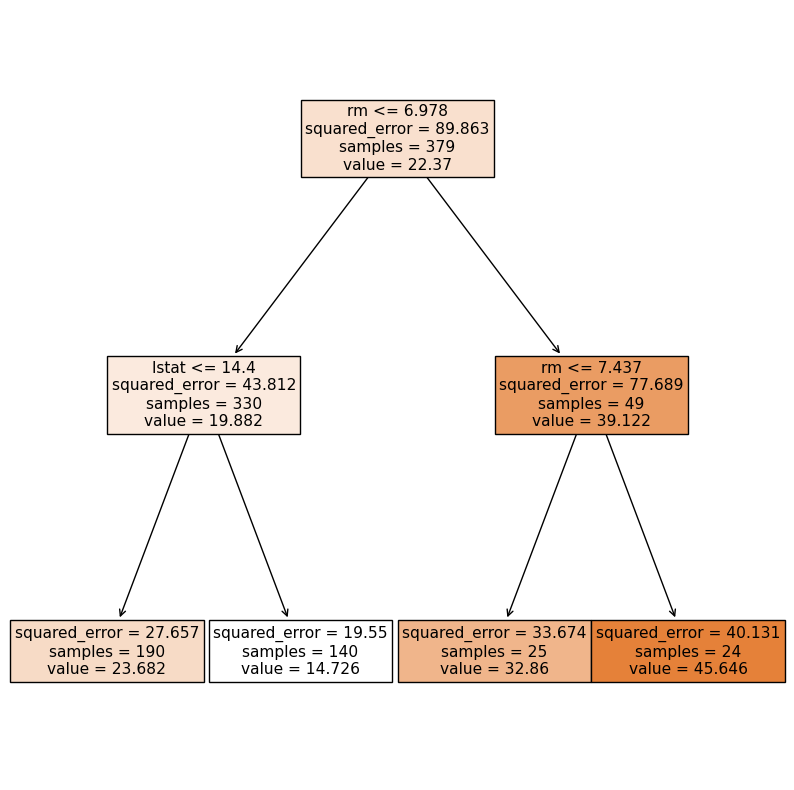

In [185]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(arvore_2, 
                    feature_names=X.columns,  
                    filled=True) 

In [186]:
#Representação impressa da árvore

representacao_textual = tree.export_text(arvore_2)
print(representacao_textual)

|--- feature_5 <= 6.98
|   |--- feature_12 <= 14.40
|   |   |--- value: [23.68]
|   |--- feature_12 >  14.40
|   |   |--- value: [14.73]
|--- feature_5 >  6.98
|   |--- feature_5 <= 7.44
|   |   |--- value: [32.86]
|   |--- feature_5 >  7.44
|   |   |--- value: [45.65]



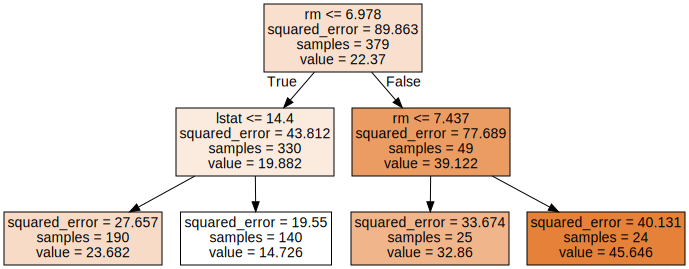

In [187]:
#Visualização da árvore com graphviz


dot_data = tree.export_graphviz(arvore_2, out_file=None, 
                                feature_names=X.columns,
                                filled=True)


graph = graphviz.Source(dot_data, format="png") 
graph



A variável que parece mais importante na árvore é a **rm** (número médio de quartos por habitação), visto que é a variável que possui a maior correlação **0.695360** e consequentemente a mais importante. 